In [1]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
df_lung_cancer = pd.read_csv("lungcancer.csv")
df_liver_disease = pd.read_csv("liver_disease.csv", encoding="Windows-1254")
df_dementia_disease = pd.read_csv("dementia_dataset.csv")
df_heart_disease = pd.read_csv("heart.csv")

In [3]:
df_dementia_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [4]:
df_liver_disease = df_liver_disease[['Age of the patient',
                                     'Gender of the patient',
                                     'Total Bilirubin',
                                     'Direct Bilirubin',
                                     'Alkphos Alkaline Phosphotase',
                                     'Sgpt Alamine Aminotransferase',
                                     'Sgot Aspartate Aminotransferase',
                                     'Total Protiens',
                                     'ALB Albumin',
                                     'A/G Ratio Albumin and Globulin Ratio',
                                     'Result']]
df_dementia_disease = df_dementia_disease[[
    'Subject ID', 'MRI ID',
    'Visit',
    'MR Delay',
    'M/F',
    'Hand',
    'Age',
    'EDUC',
    'SES',
    'MMSE',
    'CDR',
    'eTIV',
    'nWBV',
    'ASF',
    'Group'
]]

In [5]:
df_heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Preprocessing

In [6]:
df_liver_disease.info()
df_liver_disease = df_liver_disease.iloc[0:1000, :]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30689 entries, 0 to 30688
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30687 non-null  float64
 1   Gender of the patient                 29787 non-null  object 
 2   Total Bilirubin                       30041 non-null  float64
 3   Direct Bilirubin                      30128 non-null  float64
 4   Alkphos Alkaline Phosphotase          29893 non-null  float64
 5   Sgpt Alamine Aminotransferase         30151 non-null  float64
 6   Sgot Aspartate Aminotransferase       30227 non-null  float64
 7   Total Protiens                        30226 non-null  float64
 8   ALB Albumin                           30195 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30130 non-null  float64
 10  Result                                30689 non-null  int64  
dtypes: float64(9), 

In [7]:
df_lung_cancer.drop(columns=['GENDER'], inplace=True)
df_lung_cancer["LUNG_CANCER"] = df_lung_cancer["LUNG_CANCER"].map({'YES': 1, 'NO': 0})

In [8]:
df_liver_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    1000 non-null   float64
 1   Gender of the patient                 985 non-null    object 
 2   Total Bilirubin                       995 non-null    float64
 3   Direct Bilirubin                      994 non-null    float64
 4   Alkphos Alkaline Phosphotase          993 non-null    float64
 5   Sgpt Alamine Aminotransferase         995 non-null    float64
 6   Sgot Aspartate Aminotransferase       996 non-null    float64
 7   Total Protiens                        992 non-null    float64
 8   ALB Albumin                           989 non-null    float64
 9   A/G Ratio Albumin and Globulin Ratio  992 non-null    float64
 10  Result                                1000 non-null   int64  
dtypes: float64(9), int

In [9]:
df_liver_disease.drop(columns=["Gender of the patient"], inplace=True)
for col in df_liver_disease.columns.values:
    df_liver_disease[col].fillna(df_liver_disease[col].mean(), inplace=True)


In [10]:
df_liver_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    1000 non-null   float64
 1   Total Bilirubin                       1000 non-null   float64
 2   Direct Bilirubin                      1000 non-null   float64
 3   Alkphos Alkaline Phosphotase          1000 non-null   float64
 4   Sgpt Alamine Aminotransferase         1000 non-null   float64
 5   Sgot Aspartate Aminotransferase       1000 non-null   float64
 6   Total Protiens                        1000 non-null   float64
 7   ALB Albumin                           1000 non-null   float64
 8   A/G Ratio Albumin and Globulin Ratio  1000 non-null   float64
 9   Result                                1000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 78.3 KB


In [11]:
df_dementia_disease.head()

,Subject ID,MRI ID,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,OAS2_0001,OAS2_0001_MR1,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,Nondemented
1,OAS2_0001,OAS2_0001_MR2,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,Nondemented
2,OAS2_0002,OAS2_0002_MR1,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,Demented
3,OAS2_0002,OAS2_0002_MR2,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,Demented
4,OAS2_0002,OAS2_0002_MR3,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,Demented


In [12]:
df_dementia_disease.drop(
    columns=[
        "Subject ID",
        "MRI ID",
    ],
    inplace=True,
)
df_dementia_disease["Group"] = df_dementia_disease["Group"].map(
    {"Demented": 1, "Nondemented": 0}
)
df_dementia_disease["M/F"] = df_dementia_disease["M/F"].map({"M": 1, "F": 0})
df_dementia_disease["Hand"] = df_dementia_disease["Hand"].map({"R": 1, "L": 0})
df_dementia_disease["Group"].fillna(df_dementia_disease["Group"].mode())
df_dementia_disease.replace(
    {"Group": {"Demented": 1, "Nondemented": 0, np.nan: 0}}, inplace=True
)
df_dementia_disease.replace(
    {"Group": {"Converted": df_dementia_disease["Group"].mode()}}, inplace=True
)
df_dementia_disease["SES"].fillna(df_dementia_disease["SES"].mean(), inplace=True)
df_dementia_disease["MMSE"].fillna(df_dementia_disease["MMSE"].mean(), inplace=True)

for col in df_dementia_disease.columns.values:
    df_dementia_disease[col].fillna(df_dementia_disease[col].mode(), inplace=True)
df_dementia_disease["Group"].fillna(df_dementia_disease["Group"].mode(), inplace=True)
df_dementia_disease[df_dementia_disease["Group"] != 1]

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,1,0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883,0.0
1,2,457,1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876,0.0
5,1,0,0,1,88,18,3.0,28.0,0.0,1215,0.710,1.444,0.0
6,2,538,0,1,90,18,3.0,27.0,0.0,1200,0.718,1.462,0.0
7,1,0,1,1,80,12,4.0,28.0,0.0,1689,0.712,1.039,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,3,732,0,1,68,13,2.0,30.0,0.0,1506,0.740,1.165,0.0
364,4,2107,0,1,72,13,2.0,30.0,0.0,1510,0.723,1.162,0.0
370,1,0,0,1,61,13,2.0,30.0,0.0,1319,0.801,1.331,0.0
371,2,763,0,1,63,13,2.0,30.0,0.0,1327,0.796,1.323,0.0


In [13]:
for col in df_dementia_disease.columns.values:
    print(col, df_dementia_disease[col].isna().sum())

Visit 0
MR Delay 0
M/F 0
Hand 0
Age 0
EDUC 0
SES 0
MMSE 0
CDR 0
eTIV 0
nWBV 0
ASF 0
Group 0


In [14]:
# df_heart_disease = pd.get_dummies(df_heart_disease, columns=['ChestPainType'])
label_encoder = LabelEncoder()
df_heart_disease['ChestPainType'] = label_encoder.fit_transform(df_heart_disease['ChestPainType'])
df_heart_disease['ST_Slope'] = label_encoder.fit_transform(df_heart_disease['ST_Slope'])
df_heart_disease['ExerciseAngina'] = label_encoder.fit_transform(df_heart_disease['ExerciseAngina'])
df_heart_disease["RestingECG"] = label_encoder.fit_transform(df_heart_disease['RestingECG'])
df_heart_disease["Sex"] = label_encoder.fit_transform(df_heart_disease['Sex'])

In [15]:
df_dementia_disease.drop(columns=['Hand'], inplace=True)

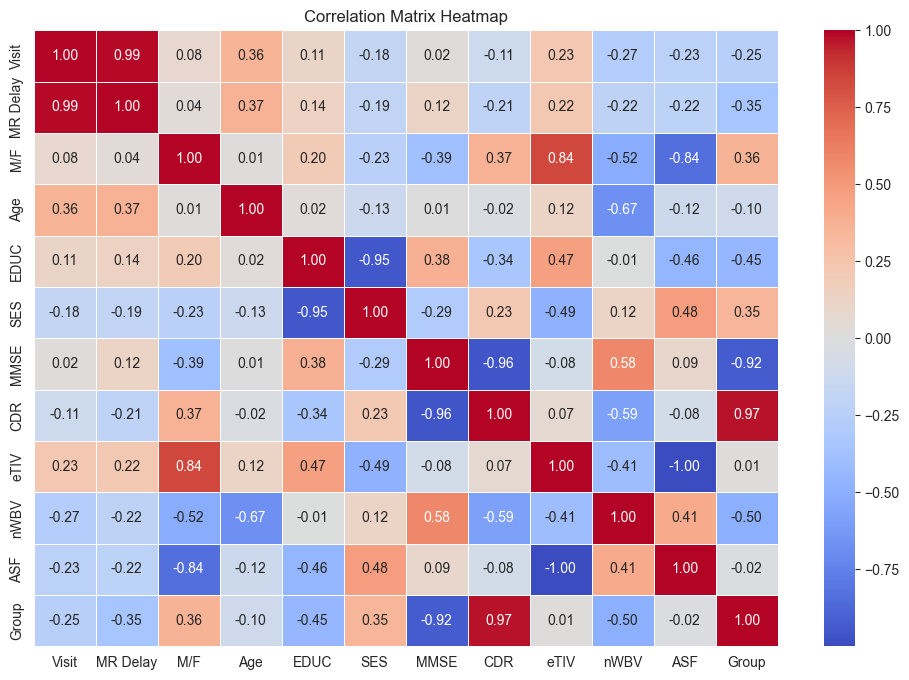

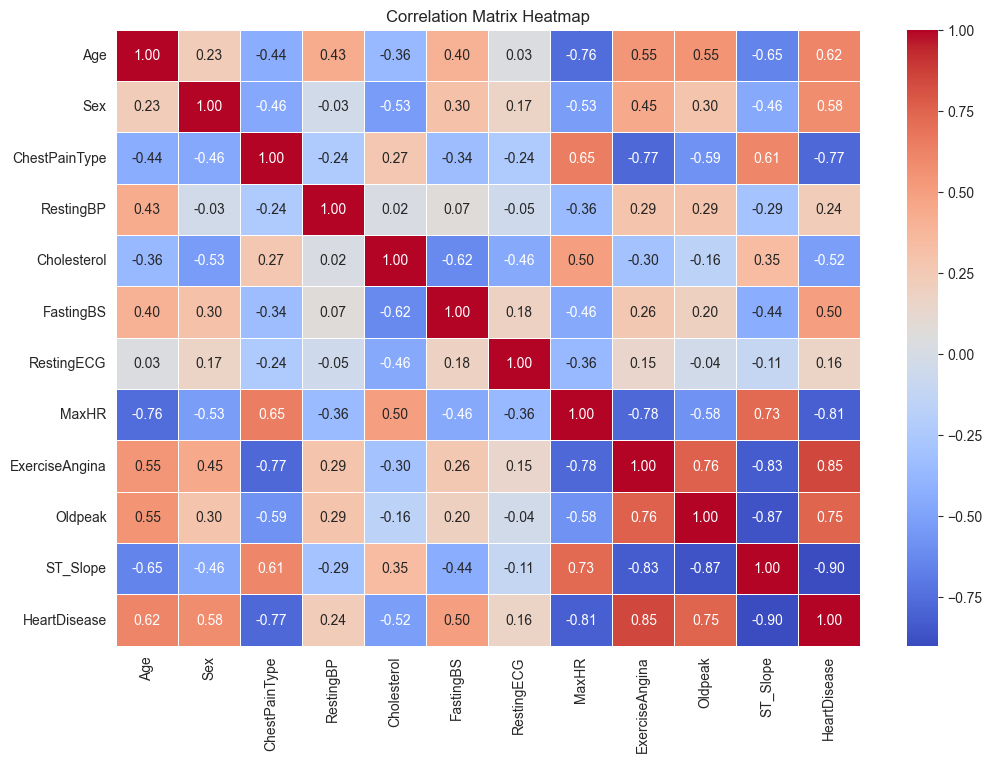

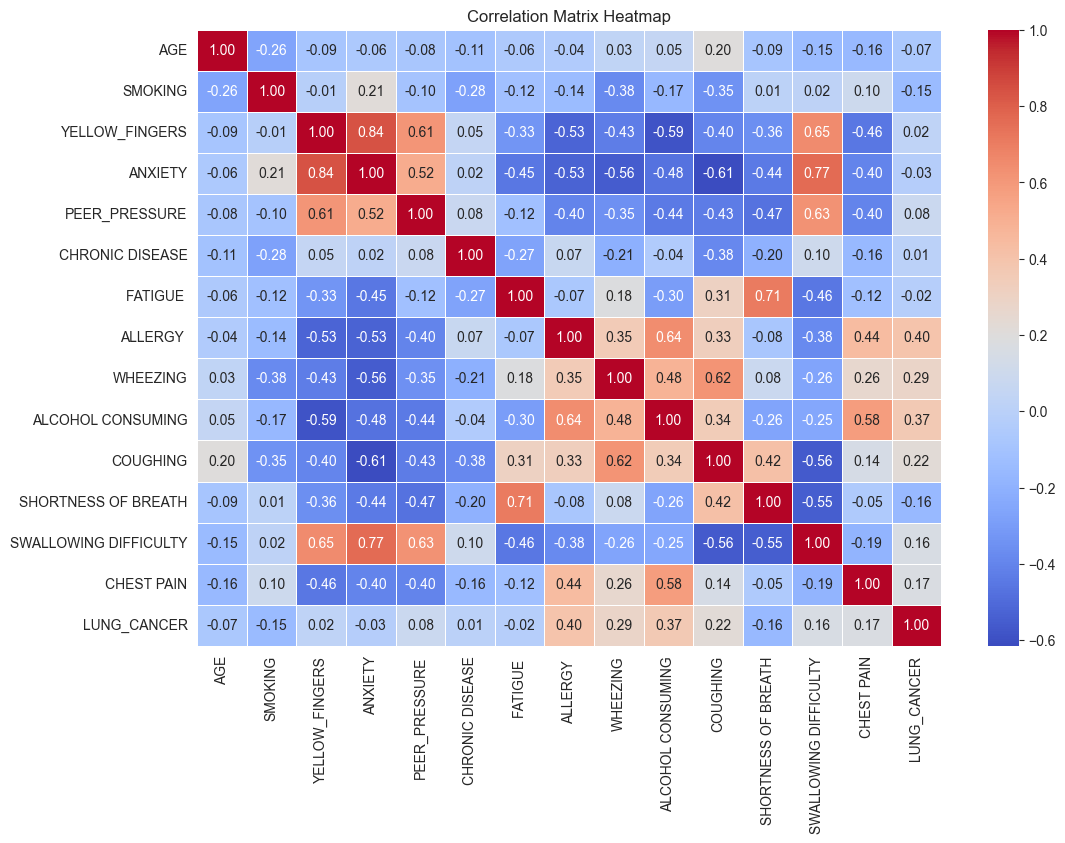

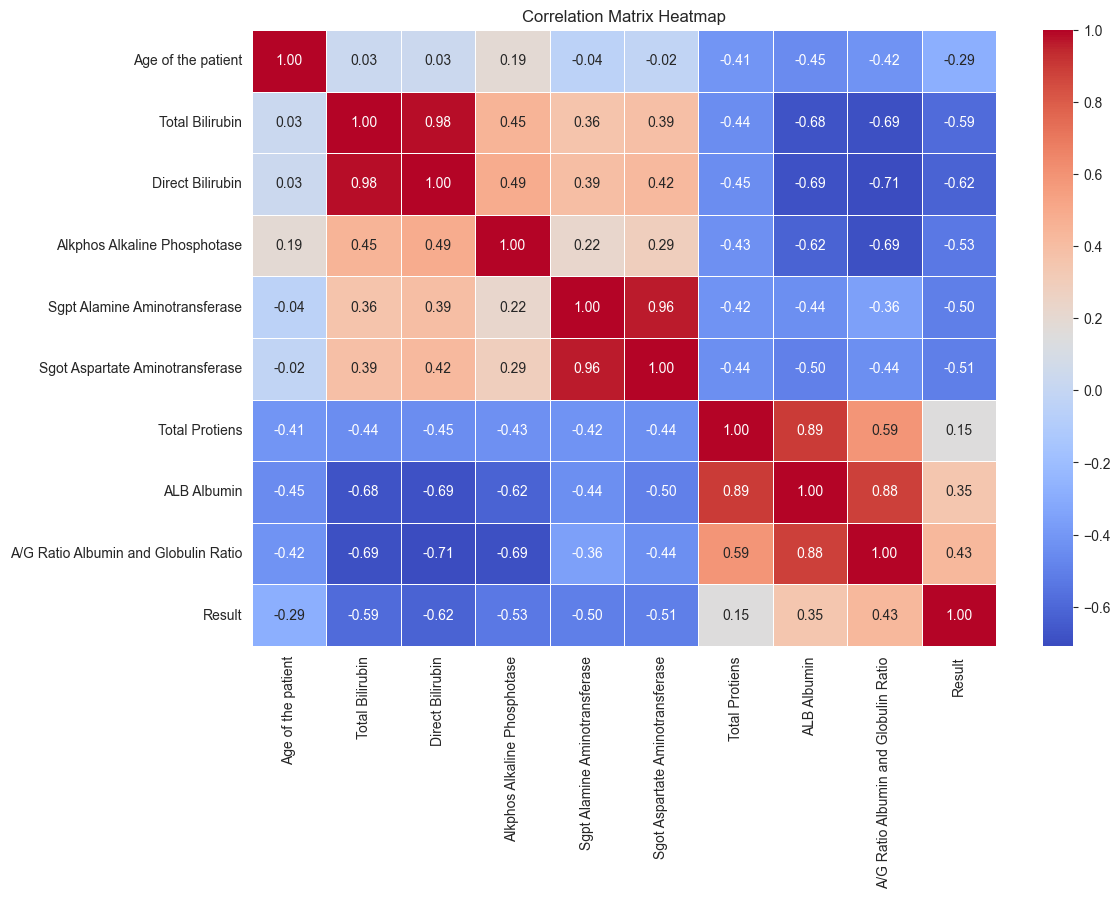

In [16]:
df1 = df_dementia_disease.corr()
df2 = df_heart_disease.corr()
df3 = df_lung_cancer.corr()
df4 = df_liver_disease.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
plt.figure(figsize=(12, 8))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
plt.figure(figsize=(12, 8))
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
def predict_output(algorithm, X_train, y_train, x_test, y_test):
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(x_test)
    return accuracy_score(y_test, y_pred).__round__(3)
def run_algorithm(algorithms,X_train, y_train, X_test, y_test):
    for alg in algorithms:
        accuracy = predict_output(alg, X_train,y_train,X_test,y_test)
        print(str(alg), accuracy)

In [22]:
from sklearn.model_selection import train_test_split

X_live_disease = pd.DataFrame(df_liver_disease.iloc[:, 0:len(df_liver_disease.columns) - 1])
y_live_disease = df_liver_disease.iloc[:, len(df_liver_disease.columns) - 1]
x_lung_cancer = pd.DataFrame(df_liver_disease.iloc[:, 0:len(df_liver_disease.columns) - 1])
y_lung_cancer = df_liver_disease.iloc[:, len(df_liver_disease.columns) - 1]
x_dementia_disease = pd.DataFrame(df_dementia_disease.iloc[:, 0:len(df_dementia_disease.columns) - 1])
y_dementia_disease = df_dementia_disease.iloc[:, len(df_dementia_disease.columns) - 1]
x_heart_disease = pd.DataFrame(df_heart_disease.iloc[:, 0:len(df_heart_disease.columns) - 1])
y_heart_disease = df_heart_disease.iloc[:, len(df_heart_disease.columns) - 1]

df_liver_disease_X_train, df_liver_disease_X_test, df_liver_disease_y_train, df_liver_disease_y_test = train_test_split(
    X_live_disease, y_live_disease, test_size=0.2, random_state=42)
df_dementia_disease_X_train, df_dementia_disease_X_test, df_dementia_disease_y_train, df_dementia_disease_y_test = train_test_split(
    x_dementia_disease, y_dementia_disease, test_size=0.2, random_state=42)
df_heart_disease_X_train, df_heart_disease_X_test, df_heart_disease_y_train, df_heart_disease_y_test = train_test_split(
    x_heart_disease, y_heart_disease, test_size=0.2, random_state=42)
df_lung_cancer_X_train, df_lung_cancer_X_test, df_lung_cancer_y_train, df_lung_cancer_y_test = train_test_split(
    x_lung_cancer, y_lung_cancer, test_size=0.2, random_state=42)


logistic_regression = LogisticRegression(max_iter=5000)
logistic_regression.fit(df_liver_disease_X_train, df_liver_disease_y_train)
log_y_pred = logistic_regression.predict(df_liver_disease_X_test)
log_acc = accuracy_score(df_liver_disease_y_test, log_y_pred).__round__(3)
print("Logistic Regression Accuracy: ", accuracy_score(df_liver_disease_y_test, log_y_pred).__round__(3))

support_vector_machine = LinearSVC(max_iter=10000, dual=False)
support_vector_machine.fit(df_dementia_disease_X_train, df_dementia_disease_y_train)
svm_y_pred = support_vector_machine.predict(df_dementia_disease_X_test)
svm_acc = accuracy_score(df_dementia_disease_y_test, svm_y_pred).__round__(3)
print("Support Vector Machine Accuracy: ",
      accuracy_score(df_dementia_disease_y_test, support_vector_machine.predict(df_dementia_disease_X_test)).__round__(
          3))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df_lung_cancer_X_train, df_lung_cancer_y_train)
knn_y_pred = knn.predict(df_lung_cancer_X_test)
knn_acc = accuracy_score(df_lung_cancer_y_test, knn_y_pred).__round__(3)
print("Decision Tree Accuracy: ", accuracy_score(df_lung_cancer_y_test, knn_y_pred).__round__(3))

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(df_heart_disease_X_train, df_heart_disease_y_train)
random_forest_y_pred = random_forest.predict(df_heart_disease_X_test)
random_forest_acc = accuracy_score(df_heart_disease_y_test, random_forest.predict(df_heart_disease_X_test)).__round__(3)
print("Random Forest Accuracy: ",
      accuracy_score(df_heart_disease_y_test, random_forest.predict(df_heart_disease_X_test)).__round__(3))

accuracy_scores = {
    'Logistic Regression': log_acc,
    'SVM': svm_acc,
    'KNN': knn_acc,
    'Random Forest': random_forest_acc
}
print("\n")
print("Liver disease")
run_algorithm([logistic_regression, support_vector_machine, knn, random_forest], df_liver_disease_X_train,
              df_liver_disease_y_train, df_liver_disease_X_test, df_liver_disease_y_test)
print("\n")
print("Dementia disease")
run_algorithm([logistic_regression, support_vector_machine, knn, random_forest], df_dementia_disease_X_train,
              df_dementia_disease_y_train, df_dementia_disease_X_test, df_dementia_disease_y_test)
print("\n")

print("Heart disease")
run_algorithm([logistic_regression, support_vector_machine, knn, random_forest], df_heart_disease_X_train,df_heart_disease_y_train, df_heart_disease_X_test, df_heart_disease_y_test)
print("\n")

print("Lung cancer")
run_algorithm([logistic_regression, support_vector_machine, knn, random_forest], df_lung_cancer_X_train,df_lung_cancer_y_train, df_lung_cancer_X_test, df_lung_cancer_y_test)


# 
# clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder= True, random_state=42)
# clf.fit(df_heart_disease_X_train, df_heart_disease_y_train)
# # Make predictions on the test set
# y_pred = clf.predict(df_heart_disease_X_test)
# d = accuracy_score(df_heart_disease_y_test, random_forest.predict(df_heart_disease_X_test)).__round__(3)
# d

Logistic Regression Accuracy:  0.725
Support Vector Machine Accuracy:  0.96
Decision Tree Accuracy:  0.68
Random Forest Accuracy:  0.875


Liver disease
LogisticRegression(max_iter=5000) 0.725
LinearSVC(dual=False, max_iter=10000) 0.735
KNeighborsClassifier() 0.68
RandomForestClassifier() 0.895


Dementia disease
LogisticRegression(max_iter=5000) 0.96
LinearSVC(dual=False, max_iter=10000) 0.96
KNeighborsClassifier() 0.573
RandomForestClassifier() 0.947


Heart disease
LogisticRegression(max_iter=5000) 0.842
LinearSVC(dual=False, max_iter=10000) 0.832
KNeighborsClassifier() 0.701
RandomForestClassifier() 0.886


Lung cancer
LogisticRegression(max_iter=5000) 0.725
LinearSVC(dual=False, max_iter=10000) 0.735
KNeighborsClassifier() 0.68
RandomForestClassifier() 0.875


{'Logistic Regression': 0.725, 'SVM': 0.96, 'KNN': 0.68, 'Random Forest': 0.886}


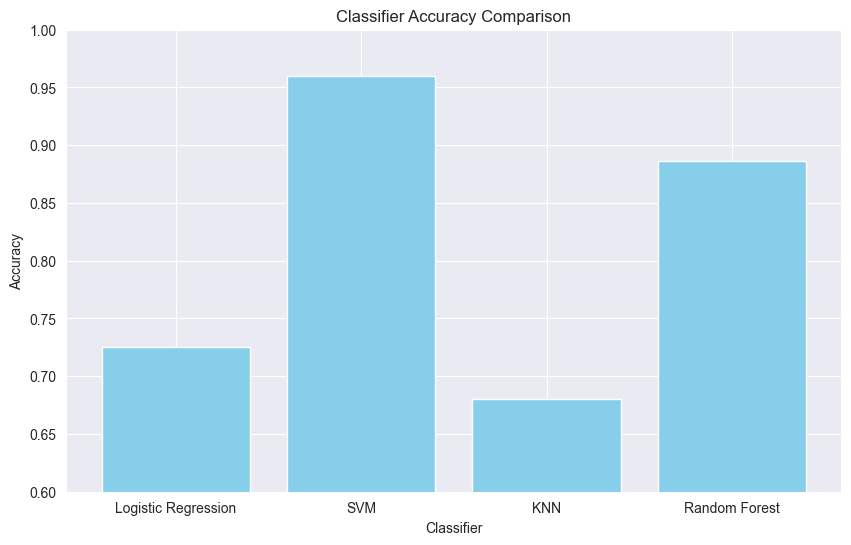

In [19]:
print(accuracy_scores)
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.0)
plt.show()

In [20]:
conf_matrix = confusion_matrix(df_liver_disease_y_test, log_y_pred)

# Create a classification report
class_report = classification_report(df_liver_disease_y_test, log_y_pred, target_names=conf_matrix.target_names)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(conf_matrix.target_names))
plt.xticks(tick_marks, conf_matrix.target_names, rotation=45)
plt.yticks(tick_marks, conf_matrix.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add labels to the cells
for i in range(len(conf_matrix.target_names)):
    for j in range(len(conf_matrix.target_names)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')

plt.show()
#

# conf_matrix = confusion_matrix(y_test, y_pred)
# 
# # Create a classification report
# class_report = classification_report(y_test, y_pred, target_names=data.target_names)
# 
# conf_matrix = confusion_matrix(y_test, y_pred)
# 
# # Create a classification report
# class_report = classification_report(y_test, y_pred, target_names=data.target_names)
# 
# conf_matrix = confusion_matrix(y_test, y_pred)
# 
# # Create a classification report
# class_report = classification_report(y_test, y_pred, target_names=data.target_names)


plt.figure(figsize=(8, 6))
plt.scatter(df_liver_disease_y_test, log_y_pred, color='blue')
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Plot the diagonal line
plt.title('Actual vs Predicted')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'target_names'

In [ ]:
df_heart_disease.head()